## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls /content/drive/My\ Drive

'Colab Notebooks'
'Copy of T.F. Newport 0212 Invitation.gform'
'Getting started.pdf'
 GU_mesh14_95x.zip
 GU_mesh14_95y.zip
 IMG_1075.JPG
 prj1_keypoints
 save_test.npy
'T.F. Newport 0212 Invitation.gform'


In [8]:
!git clone https://github.com/udacity/P1_Facial_Keypoints.git

Cloning into 'P1_Facial_Keypoints'...
remote: Enumerating objects: 5981, done.
remote: Total 5981 (delta 0), reused 0 (delta 0), pack-reused 5981
Receiving objects: 100% (5981/5981), 329.49 MiB | 39.32 MiB/s, done.
Resolving deltas: 100% (124/124), done.
Checking out files: 100% (5803/5803), done.


In the next python cell we load in required libraries for this section of the project.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import os
data_path = 'P1_Facial_Keypoints'

In [0]:
!

#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

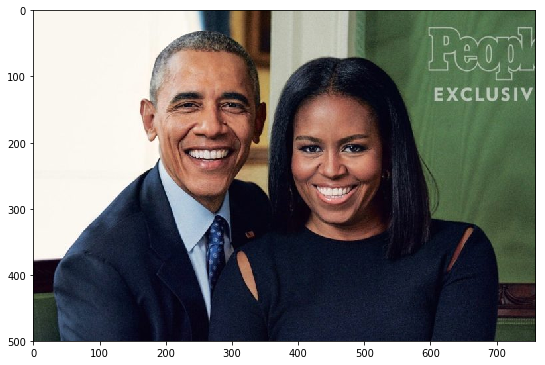

In [12]:
import cv2
# load in color image for face detection
# image = cv2.imread('images/obamas.jpg')
image = cv2.imread(os.path.join(data_path, 'images/obamas.jpg'))

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


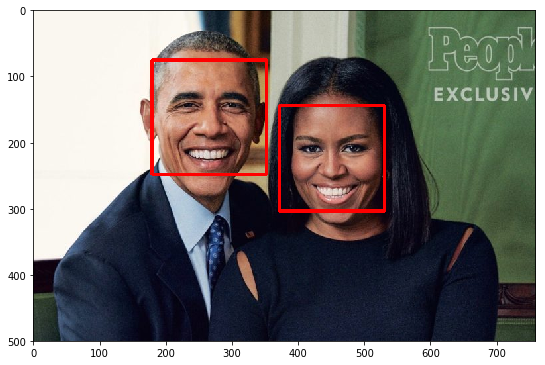

In [14]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier(os.path.join(data_path, 'detector_architectures/haarcascade_frontalface_default.xml'))

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [17]:
%run /content/drive/My\ Drive/prj1_keypoints/models.py

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


<Figure size 432x288 with 0 Axes>

In [20]:
import torch
# We have run the models.py, so no need to import again:
#from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model

#net.load_state_dict(torch.load('saved_models/keypoints_model_1.pt'))
model_path = '/content/drive/My Drive/prj1_keypoints/train_loss_lr_1e-2.pt'
net.load_state_dict(torch.load(model_path)['model_state_dict'])

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout2d(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout2d(p=0.2, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout2d(p=0.3, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop4): Dropout2d(p=0.4, inplace=False)
  (fc1): Linear(in_features=43264, out_features=256, bias=True)
  (drop5): Dropout2d(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (drop6): Dropout2d(p=0.6, inplace=False)
  (fc3): Linear(in_fe

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




In [0]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')

In [0]:
def untransform_keypoints(output_pnts):
    # Convert the output from the neural network back into meaningful point locations
    
    # output_pnts = output_pnts.view(output_pnts.size()[0], 68, -1)
    output_pnts = output_pnts.data
    output_pnts = output_pnts.numpy()
    # print(output_pnts.shape)
    output_pnts = output_pnts * 50. + 100.
    
    return output_pnts.reshape((68, 2))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


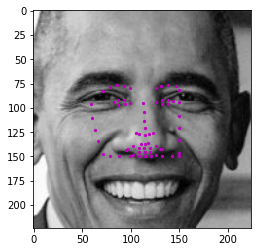

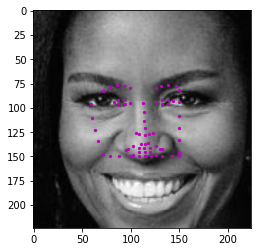

In [23]:
image_copy = np.copy(image)
net = net.float()

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    
    ## TODO: Convert the face region from RGB to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi_normal = roi_gray / 255.0
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi_sq = cv2.resize(roi_normal, (224, 224))
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    # NOTE: The first dimension is for batch size. 
    if len(roi_sq.shape) == 2:
        roi_new = roi_sq[None, :,:,None]
    roi_new = roi_new.transpose((0, 3, 1, 2))
    img = torch.from_numpy(roi_new)
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
    output_pnts = net(img.float())

    ## TODO: Display each detected face and the corresponding keypoints
    output_pnts = untransform_keypoints(output_pnts)
    # print(output_pnts)
    show_all_keypoints(roi_sq, output_pnts)
    
        


In [0]:
faces

array([[179,  74, 174, 174],
       [371, 145, 160, 160]], dtype=int32)

In [0]:
print(type(image))
print(image.shape)


<class 'numpy.ndarray'>
(500, 759, 3)


In [0]:
test = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
test.shape

(500, 759)

In [0]:
x = test[:,:,None]
x.shape

(500, 759, 1)